### Citation Analysis of the ACL Corpus for Documents of Different Topics

In [2]:
# create the citation networks
import pandas as pd

In [3]:
topic9_articles = pd.read_csv("Topic_9_documents.csv")

In [5]:
# number of articles for Topic 9 across the three journsls
topic9_articles['journal'].value_counts()

journal
Computational Linguistics                                        169
American Journal of Computational Linguistics                    107
Transactions of the Association for Computational Linguistics     11
Name: count, dtype: int64

In [6]:
# sort the articles in chronological order
topic9_articles.sort_values(by=['year'],inplace=True)

In [10]:
# replace the full journal name by abbrevation
def apply_abbreviation(row):
    if row == 'Computational Linguistics':
        return 'CL'
    elif row == "American Journal of Computational Linguistics":
        return "AJCL"
    elif row == "Transactions of the Association for Computational Linguistics":
        return 'TACL'
    
    return "Conference"
topic9_articles['journal'] = topic9_articles['journal'].apply(apply_abbreviation)

In [11]:
topic9_articles['journal'].value_counts()

journal
Conference    4449
CL             169
AJCL           107
TACL            11
Name: count, dtype: int64

### How does the number of citations change across time for each of the three journals?

In [12]:
# 
topic9_articles['journal'].value_counts()

journal
Conference    4449
CL             169
AJCL           107
TACL            11
Name: count, dtype: int64

In [13]:
# get the non_journal papers
non_journal_articles = topic9_articles.loc[(topic9_articles['journal'] != 'Computational Linguistics') & (topic9_articles['journal'] != 'American Journal of Computatational Linguistics')
                                        & (topic9_articles['journal'] != 'Transactions of the Association for Computational Linguistics')]
non_journal_articles.shape

# there are 71576 non-journal articles

(4736, 27)

In [14]:
english_topic9_papers = topic9_articles.loc[topic9_articles['language'] == 'English']

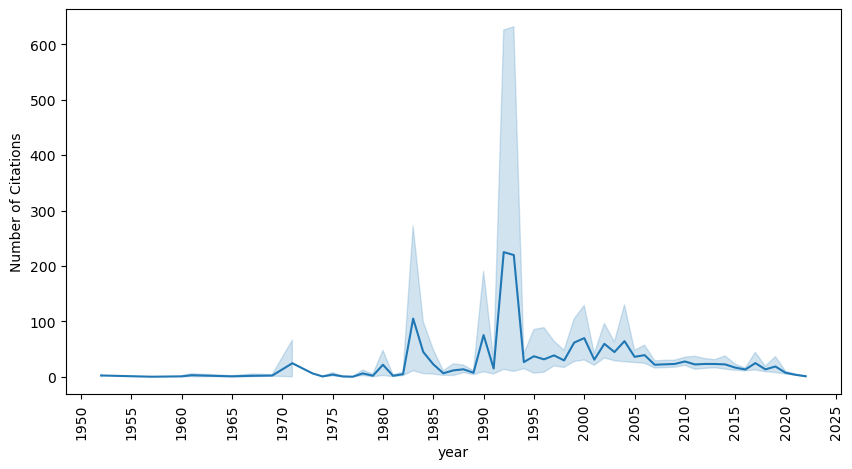

In [17]:
# visualize the number of citations across time over the three journals for all papers
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
ax = sns.lineplot(x="year",y="numcitedby", data=topic9_articles, sort=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")
plt.ylabel("Number of Citations")
plt.savefig("citations_over_time_topic9.png")